In [43]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

from graph_tool.all import *
import numpy as np
import matplotlib.pyplot as plt

from scripts.generate_network import barabasi_albert
from scripts.hrg import *
from scripts.random_attacks import *
from scripts import visualization as viz

viz.load_matplotlib()
plt = viz.plt
plt.style.use('seaborn-poster')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
dendrogram = load_dendrogram('../data/community_hrg.txt')
g = generate_hrg(dendrogram)

In [26]:
g

<Graph object, undirected, with 8000 vertices and 19981 edges, 1 internal vertex property, at 0x7fac34e68a00>

In [27]:
pos = sfdp_layout(g)

deg = g.degree_property_map("total")
print(deg.a)
deg.a = 4 * (np.sqrt(deg.a) * 0.5 + 0.4)

graph_draw(g, pos=pos, vertex_size=deg, output="hrg_test.pdf")

[5 4 9 ... 7 2 4]


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fac34e68a00, at 0x7fac36004100>

In [36]:
ps = np.linspace(0, 1, 20)

N = total_size(dendrogram)
k = avg_degree(dendrogram)
print(f'N = {N}, k = {k}')
p_er = k / N
m = round(k / 2)
ntimes = 5
type = 'edge'

mean_sizes_ba, std_sizes_ba = simulate_attack_barabasi_albert(N, ps, m=m, ntimes=ntimes, type=type)
mean_sizes_er, std_sizes_er = simulate_attack_erdos_renyi(N, p_er, ps, ntimes=ntimes, type=type)
mean_sizes_hrg, std_sizes_hrg = simulate_attack_hrg('../data/community_hrg.txt', ps, ntimes=ntimes, type=type)

  5%|▌         | 1/20 [00:00<00:02,  6.98it/s]

N = 8000, k = 5.00075


100%|██████████| 20/20 [00:28<00:00,  1.44s/it]


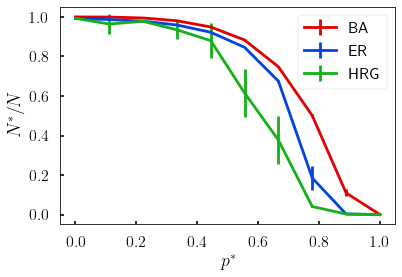

In [31]:
%matplotlib inline
plt.errorbar(ps, mean_sizes_ba, yerr=std_sizes_ba, fmt='-', label='BA', color='xkcd:red')
plt.errorbar(ps, mean_sizes_er, yerr=std_sizes_er, fmt='-', label='ER', color='xkcd:blue')
plt.errorbar(ps, mean_sizes_hrg, yerr=std_sizes_hrg, fmt='-', label='HRG', color='xkcd:green')

plt.ylim(-0.05, 1.05)
plt.ylabel('$N^*/N$', fontsize=18)
plt.xlabel('$p^*$', fontsize=18)
plt.legend()
plt.show()

In [34]:
ps = np.linspace(0, 1, 20)

N = total_size(dendrogram)
k = avg_degree(dendrogram)
print(f'N = {N}, k = {k}')
p_er = k / N
m = round(k / 2)
ntimes = 5

mean_sizes_ba, std_sizes_ba = simulate_attack_barabasi_albert(N, ps, m=m, random_attack=False, ntimes=ntimes)
mean_sizes_er, std_sizes_er = simulate_attack_erdos_renyi(N, p_er, ps, random_attack=False, ntimes=ntimes)
mean_sizes_hrg, std_sizes_hrg = simulate_attack_hrg('../data/community_hrg.txt', ps, 
                                                    random_attack=False, ntimes=ntimes)

  5%|▌         | 1/20 [00:00<00:02,  6.50it/s]

N = 8000, k = 5.00075


100%|██████████| 20/20 [00:42<00:00,  2.14s/it]


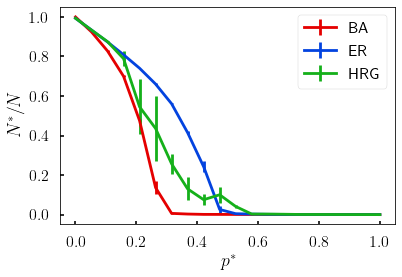

In [35]:
%matplotlib inline
plt.errorbar(ps, mean_sizes_ba, yerr=std_sizes_ba, fmt='-', label='BA', color='xkcd:red')
plt.errorbar(ps, mean_sizes_er, yerr=std_sizes_er, fmt='-', label='ER', color='xkcd:blue')
plt.errorbar(ps, mean_sizes_hrg, yerr=std_sizes_hrg, fmt='-', label='HRG', color='xkcd:green')

plt.ylim(-0.05, 1.05)
plt.ylabel('$N^*/N$', fontsize=18)
plt.xlabel('$p^*$', fontsize=18)
plt.legend()
plt.show()